In [1]:
import pandas as pd
import numpy  as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
import streamlit as st
import requests
from io import StringIO
import os


# Conectar a la base de datos SQLite
conn = sqlite3.connect(r"C:\Users\maria\Documents\UCV MARY\EECA\SEMESTRE 2024-1\SEMESTRE II\COMPUTACIÓN II\TRABAJO FINAL\SALUD MENTAL EN LA INDUSTRIA TECNOLÓGICA 1.sqlite")

cur = conn.cursor()

In [2]:
# Consultar las tablas en la base de datos
consulta_ntablas = "SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;"


# Mostrar las entidades
print("Entidades en la base de datos:")
entidades = pd.read_sql_query(sql = consulta_ntablas, con = conn)
entidades

Entidades en la base de datos:


,name
0,Answer
1,Question
2,Respuestas
3,Survey


In [3]:
# Crear consulta para convertir en DF
consulta = "SELECT * FROM Respuestas;"

df_Respuestas = pd.read_sql_query(sql = consulta, con = conn)

conn.close()

In [4]:
# Filtrado del DF por desde 2016-2019 y Estados Unidos como país para realizar la Investigación
User_ID = df_Respuestas[(df_Respuestas['QuestionID'] == 3) & (df_Respuestas['AnswerText'] == 'Estados Unidos')]['UserID'].unique()

df_Investigacion1 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2016)]

df_Investigacion2 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2017)]

df_Investigacion3 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2018)]

df_Investigacion4 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2019)]

In [5]:
# Reestructuración del DF para mejor uso de Pandas
df_Investigacion1 = df_Investigacion1.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion2 = df_Investigacion2.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion3 = df_Investigacion3.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion4 = df_Investigacion4.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion1 = df_Investigacion1.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

df_Investigacion2 = df_Investigacion2.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

df_Investigacion3 = df_Investigacion3.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

df_Investigacion4 = df_Investigacion4.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

In [6]:
# Renombrar las variables 2016
print(df_Investigacion1.columns)

df_Investigacion1.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Historial Familiar', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', '¿Cree que los Miembros de su Equipo/Compañeros de Trabajo le Verían de Forma más Negativa Si Supieran que Padece una Enfermedad Mental?', 'Enfermedades Mentales Diagnosticadas', 'Enfermedades Mentales No Diagnosticadas', 'Puesto de Trabajo', 'Trabajo Remoto']

# Reemplazar los NaN
df_Investigacion1 = df_Investigacion1.fillna('No respondió')

Index([  1,   2,   3,   4,   5,   6,   7,   8,  10,  12,  14,  16,  17,  18,
        19,  20,  23,  24,  27,  28,  30,  31,  33,  34,  48,  49,  53,  54,
        55,  56, 114, 115, 116, 117, 118],
      dtype='int64', name='QuestionID')


In [7]:
# Renombrar las variables 2017
print(df_Investigacion2.columns)

df_Investigacion2.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Historial Familiar', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', 'Importancia a la Salud Mental (Empresa)', '¿Cómo Afectó la Relación con Alguien de tu Trabajo el Haberle Contado sobre tu Enfermedad Mental?', '¿Te Identificas Abiertamente en el Trabajo como una Persona con una Enfermedad Mental?', '¿Tu Carrera Se Ha Visto Afectada por Tener una Enfermedad Mental?', 'Si Supieran Que Padeces un Trastorno Mental, ¿Cómo Crees Que Reaccionarían los Miembros de tu Equipo/Compañeros de Trabajo?', '¿Has Observado o Experimentado una Respuesta Positiva De Compañeros/Jefes al Saber que Tienes una Enfermedad Mental?', '¿En qué Medida Cree que el Sector Tecnológico Apoya a los Empleados con Enfermedades Mentales?', 'Raza']

# Reemplazar los NaN
df_Investigacion2 = df_Investigacion2.fillna('No respondió')

Index([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 16, 17, 18, 19, 20, 23, 24,
       27, 28, 30, 31, 33, 34, 48, 49, 53, 54, 55, 56, 65, 67, 78, 79, 81, 83,
       85, 89],
      dtype='int64', name='QuestionID')


In [8]:
# Renombrar las variables 2018
print(df_Investigacion3.columns)

df_Investigacion3.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Historial Familiar', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', 'Importancia a la Salud Mental (Empresa)', '¿Cómo Afectó la Relación con Alguien de tu Trabajo el Haberle Contado sobre tu Enfermedad Mental?', '¿Te Identificas Abiertamente en el Trabajo como una Persona con una Enfermedad Mental?', '¿Tu Carrera Se Ha Visto Afectada por Tener una Enfermedad Mental?', 'Si Supieran Que Padeces un Trastorno Mental, ¿Cómo Crees Que Reaccionarían los Miembros de tu Equipo/Compañeros de Trabajo?', '¿Has Observado o Experimentado una Respuesta Positiva De Compañeros/Jefes al Saber que Tienes una Enfermedad Mental?', '¿En qué Medida Cree que el Sector Tecnológico Apoya a los Empleados con Enfermedades Mentales?', 'Raza']

# Reemplazar los NaN
df_Investigacion3 = df_Investigacion3.fillna('No respondió')

Index([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 16, 17, 18, 19, 20, 23, 24,
       27, 28, 30, 31, 33, 34, 48, 49, 53, 54, 55, 56, 65, 67, 78, 79, 81, 83,
       85, 89],
      dtype='int64', name='QuestionID')


In [9]:
# Renombrar las variables 2019
print(df_Investigacion4.columns)

df_Investigacion4.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Historial Familiar', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', 'Importancia a la Salud Mental (Empresa)', '¿Cómo Afectó la Relación con Alguien de tu Trabajo el Haberle Contado sobre tu Enfermedad Mental?', '¿Te Identificas Abiertamente en el Trabajo como una Persona con una Enfermedad Mental?', '¿Tu Carrera Se Ha Visto Afectada por Tener una Enfermedad Mental?', 'Si Supieran Que Padeces un Trastorno Mental, ¿Cómo Crees Que Reaccionarían los Miembros de tu Equipo/Compañeros de Trabajo?', '¿Has Observado o Experimentado una Respuesta Positiva De Compañeros/Jefes al Saber que Tienes una Enfermedad Mental?', '¿En qué Medida Cree que el Sector Tecnológico Apoya a los Empleados con Enfermedades Mentales?', 'Raza']

# Reemplazar los NaN
df_Investigacion4 = df_Investigacion4.fillna('No respondió')

Index([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 16, 17, 18, 19, 20, 23, 24,
       27, 28, 30, 31, 33, 34, 48, 49, 53, 54, 55, 56, 65, 67, 78, 79, 81, 83,
       85, 89],
      dtype='int64', name='QuestionID')


In [10]:
# Carpeta donde deseas guardar los archivos CSV
output_folder = r"C:\Users\maria\Documents\UCV MARY\EECA\SEMESTRE 2024-1\SEMESTRE II\COMPUTACIÓN II\TRABAJO FINAL\CSV"

# Crear la carpeta si no existe
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Guardar los archivos CSV en la carpeta especificada
df_Investigacion1.to_csv(os.path.join(output_folder, 'Investigacion1.csv'), index=False)
df_Investigacion2.to_csv(os.path.join(output_folder, 'Investigacion2.csv'), index=False)
df_Investigacion3.to_csv(os.path.join(output_folder, 'Investigacion3.csv'), index=False)
df_Investigacion4.to_csv(os.path.join(output_folder, 'Investigacion4.csv'), index=False)

In [11]:
# HTML
# Título de la aplicación
st.title("Problemáticas y Estigmas de las Enfermedades Mentales en la Industria Tecnológica Estadounidense 2016-2019")

# Contenido de la página 1
st.header("Introducción")
st.write("Información de la Data Suministrada.")

# Contenido de la página 2
st.header("Visualización de los Datos")
st.write("Información de la Data Suministrada.")

@st.cache
def load_csv_from_github(url):
    response = requests.get(url)
    if response.status_code == 200:
        return pd.read_csv(StringIO(response.text))
    else:
        st.error("Failed to load data from GitHub.")
        return None

# URLs of CSV files in GitHub repository
urls = {
    '2016': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/f9543f9242e7869a95a82e55fb2d1289971a9c40/CSV/Investigacion1.csv',
    '2017': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/f9543f9242e7869a95a82e55fb2d1289971a9c40/CSV/Investigacion2.csv',
    '2018': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/f9543f9242e7869a95a82e55fb2d1289971a9c40/CSV/Investigacion3.csv',
    '2019': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/f9543f9242e7869a95a82e55fb2d1289971a9c40/CSV/Investigacion4.csv'
}

# Load CSV files from GitHub
df_2016 = load_csv_from_github(urls['2016'])
df_2017 = load_csv_from_github(urls['2017'])
df_2018 = load_csv_from_github(urls['2018'])
df_2019 = load_csv_from_github(urls['2019'])

# Crea un selectbox con las opciones
option = st.selectbox('Año de Encuesta:', ['2016', '2017', '2018', '2019'])

# Muestra el DataFrame correspondiente según la opción seleccionada
if option == '2016':
    st.dataframe(df_2016)
elif option == '2017':
    st.dataframe(df_2017)
elif option == '2018':
    st.dataframe(df_2018)
elif option == '2019':
    st.dataframe(df_2019)


2024-06-24 11:36:55.995 
  command:

    streamlit run C:\Users\maria\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-06-24 11:36:55.997 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new caching commands, `st.cache_data` or `st.cache_resource`.
More information [in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching logic used by `st.cache_data` and `st.cache_resource`.
This might lead to some problems or unexpected behavior in certain edge cases.

2024-06-24 11:36:55.997 No runtime found, using MemoryCacheStorageManager
2024-06-24 11:36:55.999 No runtime found, using MemoryCacheStorageManager
2024-06-24 11:37:11.641 Session state does not function when running a script without `streamlit run`


In [15]:
# PREGUNTA #1
#¿Cuántas personas en la industria tecnológica tienen una enfermedad mental diagnosticada y, dentro de este grupo, existe algún historial familiar dentro de este ámbito?

# Crea un selectbox con las opciones
option = st.selectbox('Año de Encuesta:', ['Todos','2016', '2017', '2018', '2019'])

if option == '2016':
    st.write("¿Cuántas personas en la industria tecnológica tienen una enfermedad mental diagnosticada y, dentro de este grupo, existe algún historial familiar dentro de este ámbito?")

    #Crear la tabla bivariante con pandas
    Pregunta2016_1 = pd.crosstab(df_2016['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2016['Historial Familiar'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
    Pregunta2016_1.index.name = "Historial Familiar"
    
    # Agregar una fila debajo de los títulos de las columnas 
    Pregunta2016_1.loc['Enfermedad Mental'] = ['', '', '', '']

    Pregunta2016_1 = Pregunta2016_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2016_1.index if i != 'Enfermedad Mental'])
    
    Pregunta2016_1.rename(columns={'index': 'Enfermedad Mental'})

    st.dataframe(Pregunta2016_1, width=800, height=177)


elif option == '2017':
    st.write("¿Cuántas personas en la industria tecnológica tienen una enfermedad mental diagnosticada y, dentro de este grupo, existe algún historial familiar dentro de este ámbito?")

    #Crear la tabla bivariante con pandas
    Pregunta2017_1 = pd.crosstab(df_2017['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2017['Historial Familiar'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
    Pregunta2017_1.index.name = "Historial Familiar"
    
    # Agregar una fila debajo de los títulos de las columnas 
    Pregunta2017_1.loc['Enfermedad Mental'] = ['', '', '', '']

    Pregunta2017_1 = Pregunta2017_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2017_1.index if i != 'Enfermedad Mental'])
    
    Pregunta2017_1.rename(columns={'index': 'Enfermedad Mental'})

    Pregunta2017_1 = Pregunta2017_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2017_1.index if i not in ['Enfermedad Mental', 'No respondió', 'Total']] + ['No respondió'] + ['Total'])
    
    st.dataframe(Pregunta2017_1, width=800, height=212)


elif option == '2018':
    st.write("¿Cuántas personas en la industria tecnológica tienen una enfermedad mental diagnosticada y, dentro de este grupo, existe algún historial familiar dentro de este ámbito?")

    #Crear la tabla bivariante con pandas
    Pregunta2018_1 = pd.crosstab(df_2018['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2018['Historial Familiar'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
    Pregunta2018_1.index.name = "Historial Familiar"
    
    # Agregar una fila debajo de los títulos de las columnas 
    Pregunta2018_1.loc['Enfermedad Mental'] = ['', '', '', '']

    Pregunta2018_1 = Pregunta2018_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2018_1.index if i != 'Enfermedad Mental'])
    
    Pregunta2018_1.rename(columns={'index': 'Enfermedad Mental'})

    Pregunta2018_1 = Pregunta2018_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2018_1.index if i not in ['Enfermedad Mental', 'No respondió', 'Total']] + ['No respondió'] + ['Total'])
    
    st.dataframe(Pregunta2018_1, width=800, height=212)


elif option == '2019':
    st.write("¿Cuántas personas en la industria tecnológica tienen una enfermedad mental diagnosticada y, dentro de este grupo, existe algún historial familiar dentro de este ámbito?")

    #Crear la tabla bivariante con pandas
    Pregunta2019_1 = pd.crosstab(df_2019['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2019['Historial Familiar'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
    Pregunta2019_1.index.name = "Historial Familiar"
    
    # Agregar una fila debajo de los títulos de las columnas 
    Pregunta2019_1.loc['Enfermedad Mental'] = ['', '', '', '']

    Pregunta2019_1 = Pregunta2019_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2019_1.index if i != 'Enfermedad Mental'])
    
    Pregunta2019_1.rename(columns={'index': 'Enfermedad Mental'})

    Pregunta2019_1 = Pregunta2019_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2019_1.index if i not in ['Enfermedad Mental', 'No respondió', 'Total']] + ['No respondió'] + ['Total'])

    st.dataframe(Pregunta2019_1, width=800, height=212)

Historial Familiar   No  No sé   Si  Total
Enfermedad Mental                         
No                  170     76  120    366
Si                   70     70  333    473
Total               240    146  453    839


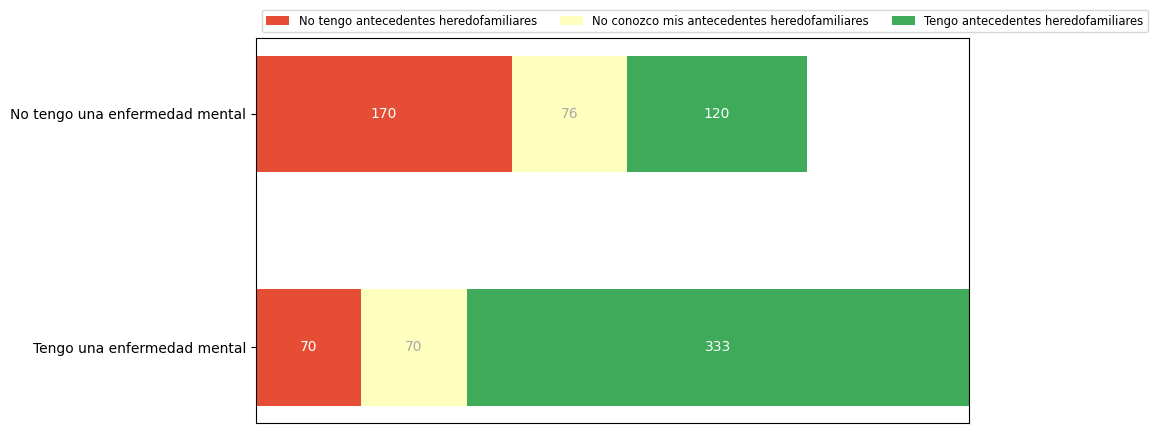

In [26]:
#Crear la tabla bivariante con pandas
Pregunta2016_1 = pd.crosstab(df_2016['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2016['Historial Familiar'], 
                        margins=True, 
                        margins_name='Total')

# Renombrar el índice
Pregunta2016_1.index.name = "Enfermedad Mental"
Pregunta2016_1.columns.name = 'Historial Familiar'

print(Pregunta2016_1)


category_names = ['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes heredofamiliares', 'Tengo antecedentes heredofamiliares']
results = {
    'No tengo una enfermedad mental': [170, 76, 120],
    'Tengo una enfermedad mental': [70, 70, 333]
}


def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()


C:\Users\maria\AppData\Local\Temp\ipykernel_17604\726474581.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\maria\AppData\Local\Temp\ipykernel_17604\726474581.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



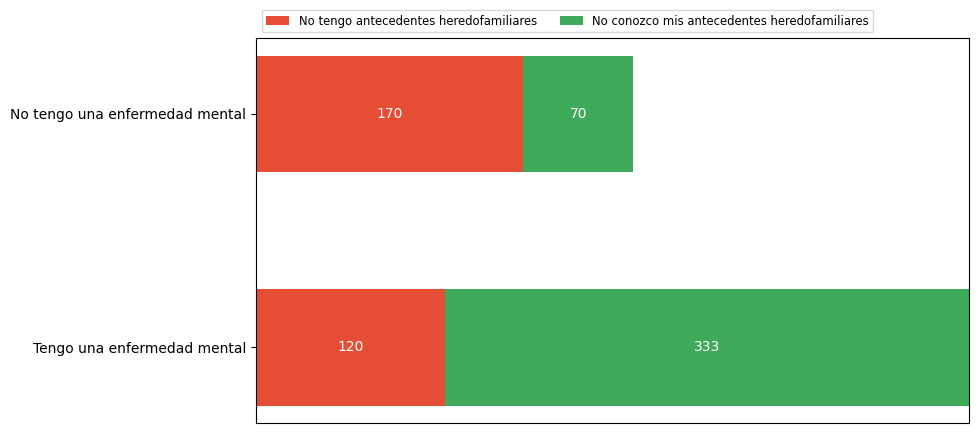

In [35]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['No tengo una enfermedad mental', 'Tengo una enfermedad mental', 'No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes heredofamiliares', 'Tengo antecedentes heredofamiliares']


def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

fig, ax = survey(results, category_names)
plt.show()

KeyError: 'Sí'

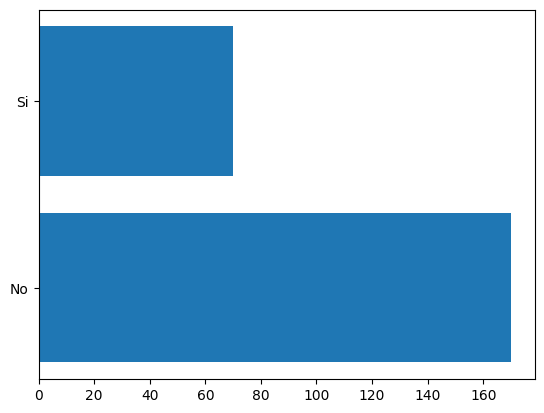

In [36]:
#PREGUNTA 3

# Assuming 'df_Investigacion1' is your DataFrame
filtered_df = df_Investigacion1[df_Investigacion1['Situación Mental Actual'] == 'Si']

# Group by UserID and count the occurrences
grouped_df = filtered_df.groupby('UserID').size().reset_index(name='Cantidad de Empleados en la Empresa')

# Merge the counts back to the original DataFrame
resultado_df = df_Investigacion1.merge(grouped_df, on='UserID', how='left')

# Extract relevant columns and rename 'Cantidad de Empleados en la Empresa'
new_df = resultado_df[['Situación Mental Actual', 'Cantidad de Empleados en la Empresa_x']].copy()

# Filter new_df to only include rows where 'Situación Mental Actual' is 'Si'
new_df = new_df[new_df['Situación Mental Actual'] == 'Si']

counts = new_df['Cantidad de Empleados en la Empresa_x'].value_counts()
print(counts)

counts = new_df['Cantidad de Empleados en la Empresa_x'].value_counts()
print(counts)


counts_df = counts.to_frame('Cantidad de Personas con Enfermedad Mental dentro de la Empresa')
counts_df['Porcentaje'] = (counts / counts.sum()) * 100
counts_df['Porcentaje'] = counts_df['Porcentaje'].round(2)
# Agregar fila con el total
counts_df.loc['Total'] = [counts.sum(), 100.00]
print(counts_df)

#df_Investigacion2

# Assuming 'df_Investigacion2' is your DataFrame
filtered_df2 = df_Investigacion2[df_Investigacion2['Situación Mental Actual'] == 'Si']

# Group by UserID and count the occurrences
grouped_df2 = filtered_df2.groupby('UserID').size().reset_index(name='Cantidad de Empleados en la Empresa')

# Merge the counts back to the original DataFrame
resultado_df2 = df_Investigacion2.merge(grouped_df2, on='UserID', how='left')

# Extract relevant columns and rename 'Cantidad de Empleados en la Empresa'
new2_df = resultado2_df[['Situación Mental Actual', 'Cantidad de Empleados en la Empresa']].copy()

# Filter new_df to only include rows where 'Situación Mental Actual' is 'Si' or 'Seguramente si'
new2_df = new2_df[(new2_df['Situación Mental Actual'] == 'Si') | (new2_df['Situación Mental Actual'] == 'Seguramente si')]

counts2 = new2_df['Cantidad de Empleados en la Empresa'].value_counts()
print(counts2)

counts2_df = counts2.to_frame('Cantidad de Personas con Enfermedad Mental dentro de la Empresa')
counts2_df['Porcentaje'] = (counts2 / counts2.sum()) * 100
counts2_df['Porcentaje'] = counts2_df['Porcentaje'].round(2)
# Agregar fila con el total
counts2_df.loc['Total'] = [counts2.sum(), 100.00]
print(counts2_df)



#df_Investigacion3
# Assuming 'df_Investigacion3' is your DataFrame
filtered_df3 = df_Investigacion3[df_Investigacion3['Situación Mental Actual'] == 'Si']

# Group by UserID and count the occurrences
grouped_df3 = filtered_df3.groupby('UserID').size().reset_index(name='Cantidad de Empleados en la Empresa')

# Merge the counts back to the original DataFrame
resultado_df3 = df_Investigacion3.merge(grouped_df3, on='UserID', how='left')

# Extract relevant columns and rename 'Cantidad de Empleados en la Empresa'
new3_df = resultado_df3[['Situación Mental Actual', 'Cantidad de Empleados en la Empresa_x']].copy()

# Filter new_df to only include rows where 'Situación Mental Actual' is 'Si' or 'Seguramente si'
new3_df = new3_df[(new3_df['Situación Mental Actual'] == 'Si') | (new3_df['Situación Mental Actual'] == 'Seguramente si')]

counts3 = new3_df['Cantidad de Empleados en la Empresa_x'].value_counts()
print(counts3)

counts3_df = counts3.to_frame('Cantidad de Personas con Enfermedad Mental dentro de la Empresa')
counts3_df['Porcentaje'] = (counts3 / counts3.sum()) * 100
counts3_df['Porcentaje'] = counts3_df['Porcentaje'].round(2)
# Agregar fila con el total
counts3_df.loc['Total'] = [counts3.sum(), 100.00]
print(counts3_df)


Cantidad de Empleados en la Empresa_x
26-100          85
Más de 1000     82
100-500         80
No respondió    65
6-25            50
500-1000        19
1-5             12
Name: count, dtype: int64
Cantidad de Empleados en la Empresa_x
26-100          85
Más de 1000     82
100-500         80
No respondió    65
6-25            50
500-1000        19
1-5             12
Name: count, dtype: int64
                                       Cantidad de Personas con Enfermedad Mental dentro de la Empresa  \
Cantidad de Empleados en la Empresa_x                                                                    
26-100                                                                              85.0                 
Más de 1000                                                                         82.0                 
100-500                                                                             80.0                 
No respondió                                                                

NameError: name 'resultado2_df' is not defined

Cantidad de Empleados en la Empresa_x
Más de 1000     71
100-500         44
6-25            31
26-100          30
500-1000        24
No respondió    18
1-5              3
Name: count, dtype: int64
                                       Cantidad de Personas con Enfermedad Mental dentro de la Empresa  \
Cantidad de Empleados en la Empresa_x                                                                    
Más de 1000                                                                         71.0                 
100-500                                                                             44.0                 
6-25                                                                                31.0                 
26-100                                                                              30.0                 
500-1000                                                                            24.0                 
No respondió                                                 

In [ ]:
#PREGUNTA 6

# Agregar un índice único a cada dataframe
df_Investigacion = df_Investigacion.reset_index()
df_Investigacion = df_Investigacion.rename(columns={'index': 'UserID'})

# Asignar las columnas que deseas unir a una lista
columns_to_join = ["Situación Mental Actual", "Productividad Afectada Por Enfermedad Mental", "Porcentaje de Tiempo Afectada por Enfermedad Mental"]

# Realizar el join utilizando la columna UserID como clave
joined_df = df_Investigacion.set_index("UserID")[columns_to_join].join(df_Investigacion.set_index("UserID")[columns_to_join], on="UserID")

# Resetear el índice para que UserID sea una columna nuevamente
joined_df.reset_index(inplace=True)

KeyError: "['Porcentaje de Tiempo Afectada por Enfermedad Mental'] not in index"

In [ ]:
# ¿Si Expresas que posees una Enfermedad Mental crees que en tu ambiente de Trabajo seria tomado de Mala manera?
Pregunta_5 = df_Investigacion['¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?'].value_counts().to_frame('Posee Enfermedad Mental Diagnosticada')

Pregunta_5 = Pregunta_5.rename(columns={'count': 'Posee Enfermedad Mental Diagnosticada'})

print(Pregunta_5)

                                                    Posee Enfermedad Mental Diagnosticada
¿Has Observado o Experimentado una Respuesta In...                                       
No                                                                                    341
Tal vez/No estoy seguro(a)                                                            215
Si, lo he visto                                                                       155
Si, me ha pasado                                                                       89
No respondió                                                                           39


In [ ]:
import matplotlib.colors as mcolors
# Create an array of colors with a gradient
colors = np.array(['#6495ED', '#87CEEB', '#ADD8E6', '#C6E2B5', '#D9F0D9'])

# Sort the values and indices of Pregunta_5 in descending order
sorted_indices = Pregunta_5['Posee Enfermedad Mental Diagnosticada'].sort_values(ascending=False).index
sorted_values = Pregunta_5['Posee Enfermedad Mental Diagnosticada'].sort_values(ascending=False)

# Reverse the order of the sorted indices and values
sorted_indices = sorted_indices[::-1]
sorted_values = sorted_values[::-1]

# Create the colors gradient (use the sorted indices to select the colors)
colors_grad = [colors[i % len(colors)] for i in range(len(sorted_values))]

# Create the horizontal bar chart
plt.barh(sorted_indices, sorted_values, color=colors_grad)

# Add labels, title, etc.
plt.xlabel('Cantidad')
plt.ylabel('Reacción al confesar tener una Enfermedad Mnetal')
plt.title('Posee Enfermedad Mental Diagnosticada')

# Show the chart
plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_9460\2807150385.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [ ]:
# Pregunta 2
# ¿Cuáles son las 5 enfermedades más comunes de los encuestados según el estado donde residen? ¿Cambiaría este ranking si se toma en cuenta la edad y el genero? 
pregunta_2 = df_Investigacion[df_Investigacion['Enfermedades Mentales Diagnosticadas']!= 'No respondió'].groupby('Ciudad de Residencia (EEUU)')['Enfermedades Mentales Diagnosticadas'].value_counts().nlargest(5).reset_index(name='Frecuencia')

pregunta_2 = pregunta_2.loc[:, ['Enfermedades Mentales Diagnosticadas', 'Ciudad de Residencia (EEUU)', 'Frecuencia']]  # Reordenar columnas

pregunta_2.columns = ['Enfermedades Mentales Diagnosticadas', 'Ciudad de Residencia (EEUU)', 'Cantidad de personas']  # Renombrar columnas

print(pregunta_2.to_string(header=True, index=False))

                               Enfermedades Mentales Diagnosticadas Ciudad de Residencia (EEUU)  Cantidad de personas
           Trastorno de Ansiedad (Genralizado, Social, Fobia, etc.)                  California                    34
Trastorno del Estado del Ánimo (Depresión, Trastorno Bipolar, etc.)                  California                    19
           Trastorno de Ansiedad (Genralizado, Social, Fobia, etc.)                    Illinois                    18
           Trastorno de Ansiedad (Genralizado, Social, Fobia, etc.)                 Pensilvania                    16
           Trastorno de Ansiedad (Genralizado, Social, Fobia, etc.)                  Nueva York                    13


In [ ]:
# Parte 2, Pregunta 2
df_Investigacionp2=df_Investigacion
# Convertir la columna Edad a tipo numérico, convirtiendo valores no numéricos a NaN
df_Investigacionp2['Edad'] = pd.to_numeric(df_Investigacionp2['Edad'], errors='coerce')

# Eliminar filas con valores NaN en la columna Edad
df_Investigacionp2 = df_Investigacionp2.dropna(subset=['Edad'])

# Convertir la columna Edad a tipo entero
df_Investigacionp2['Edad'] = df_Investigacionp2['Edad'].astype(int)

# Convertir la columna Enfermedades Mentales Diagnosticadas a tipo string
df_Investigacionp2['Enfermedades Mentales Diagnosticadas'] = df_Investigacionp2['Enfermedades Mentales Diagnosticadas'].astype(str)

# Crear una columna Edad_binned con los rangos de edad
df_Investigacionp2['Edad'] = pd.cut(df_Investigacionp2['Edad'], bins=[18, 25, 32, 38, 44, 50, 56, 66], 
                                 labels=['19-25', '26-32', '33-38', '39-44', '45-50', '51-56', '57-66'],
                                 include_lowest=True)

# Eliminar filas con "No respondio" en la columna Enfermedades Mentales Diagnosticadas
df_Investigacionp2 = df_Investigacionp2[~df_Investigacionp2['Enfermedades Mentales Diagnosticadas'].isin(['No respondió'])]

# Agrupar por Edad y Enfermedades Mentales Diagnosticadas, y contar la frecuencia
pregunta2_2 = df_Investigacionp2.groupby(['Edad', 'Enfermedades Mentales Diagnosticadas']).size().reset_index(name='Cantidad de personas')

# Seleccionar la enfermedad mental más frecuente para cada rango de edad
pregunta2_2 = pregunta2_2.loc[pregunta2_2.groupby('Edad')['Cantidad de personas'].idxmax()]

# Reordenar las columnas
pregunta2_2 = pregunta2_2[['Enfermedades Mentales Diagnosticadas', 'Edad', 'Cantidad de personas']]

# Mostrar la tabla con la enfermedad mental más frecuente para cada rango de edad
print(pregunta2_2)

                 Enfermedades Mentales Diagnosticadas   Edad  \
8   Trastorno de Ansiedad (Genralizado, Social, Fo...  19-25   
22  Trastorno de Ansiedad (Genralizado, Social, Fo...  26-32   
36  Trastorno de Ansiedad (Genralizado, Social, Fo...  33-38   
50  Trastorno de Ansiedad (Genralizado, Social, Fo...  39-44   
64  Trastorno de Ansiedad (Genralizado, Social, Fo...  45-50   
78  Trastorno de Ansiedad (Genralizado, Social, Fo...  51-56   
92  Trastorno de Ansiedad (Genralizado, Social, Fo...  57-66   

    Cantidad de personas  
8                     37  
22                    75  
36                    65  
50                    28  
64                    14  
78                     5  
92                     4  


C:\Users\maria\AppData\Local\Temp\ipykernel_9460\3695608321.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Investigacionp2['Edad'] = df_Investigacionp2['Edad'].astype(int)
C:\Users\maria\AppData\Local\Temp\ipykernel_9460\3695608321.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Investigacionp2['Enfermedades Mentales Diagnosticadas'] = df_Investigacionp2['Enfermedades Mentales Diagnosticadas'].astype(str)
C:\Users\maria\AppData\Local\Temp\ipykernel_9460\3695608321.py:16: SettingWithCopyWarn

In [ ]:
# Parte 3, pregunta 2
Pregunta2_3 = df_Investigacion.groupby(['Enfermedades Mentales Diagnosticadas', 'Género']).size().reset_index(name='Cantidad de personas')

Pregunta2_3 = Pregunta2_3[Pregunta2_3['Género']!= 'No respondió']  # Eliminar "No respondió" de la columna "Género"

top_5_enfermedades = Pregunta2_3.groupby('Enfermedades Mentales Diagnosticadas')['Cantidad de personas'].sum().nlargest(6).index

Pregunta2_3 = Pregunta2_3[Pregunta2_3['Enfermedades Mentales Diagnosticadas'].isin(top_5_enfermedades)]

Pregunta2_3 = Pregunta2_3[Pregunta2_3['Enfermedades Mentales Diagnosticadas']!= 'No respondió']

Pregunta2_3 = Pregunta2_3.pivot_table(index='Enfermedades Mentales Diagnosticadas', columns='Género', values='Cantidad de personas', fill_value=0)

print(Pregunta2_3)

Género                                              Femenino  Masculino  Otro
Enfermedades Mentales Diagnosticadas                                         
Trastorno Obsesivo-Compulsivo                            0.0        3.0   0.0
Trastorno de Ansiedad (Genralizado, Social, Fob...      90.0      130.0   7.0
Trastorno de Estrés Post-Traumático                      1.0        6.0   0.0
Trastorno del Estado del Ánimo (Depresión, Tras...      45.0       66.0   5.0
Trastorno por Déficit de Atención e Hiperactividad       2.0       16.0   1.0
